In [5]:
import pickle

In [6]:
import os
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [8]:
os.chdir('drive/My Drive/Tensorflow')

# Loading Data

In [9]:
x = pickle.load(open('preprocessing/x_norm.pickle','rb'))
y = pickle.load(open('preprocessing/y_norm.pickle','rb'))

In [10]:
x.drop('index',axis=1,inplace=True)

# Multiple Linear Regression

$\hat y = a + b_1 X_1 + b_2 X_2 + ... + b_n X_n $

In [11]:
# convert into array
x = x.values
y = y.values

In [12]:
x.shape, y.shape

((3189, 13), (3189, 1))

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [14]:
def multi_regression():
  model = Sequential([layers.Dense(units=1,input_shape=(13,))])
  loss = tf.keras.losses.mean_squared_error
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile
  model.compile(loss=loss,optimizer=optimizer,metrics = ['mse'])
  return model

In [15]:
model = multi_regression()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2551, 13), (638, 13), (2551, 1), (638, 1))

In [18]:
# train
history = model.fit(x_train,y_train,batch_size=100,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
26/26 [==============================] - 1s 8ms/step - loss: 2.8846 - mse: 2.8846 - val_loss: 2.4335 - val_mse: 2.4335
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 2.5305 - mse: 2.5305 - val_loss: 2.1233 - val_mse: 2.1233
Epoch 3/200
26/26 [==============================] - 0s 3ms/step - loss: 2.2254 - mse: 2.2254 - val_loss: 1.8612 - val_mse: 1.8612
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 1.9695 - mse: 1.9695 - val_loss: 1.6354 - val_mse: 1.6354
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 1.7497 - mse: 1.7497 - val_loss: 1.4476 - val_mse: 1.4476
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 1.5638 - mse: 1.5638 - val_loss: 1.2899 - val_mse: 1.2899
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 1.4076 - mse: 1.4076 - val_loss: 1.1542 - val_mse: 1.1542
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 1.2747 - m

In [19]:
hist = history.history
df_hist = pd.DataFrame(hist)

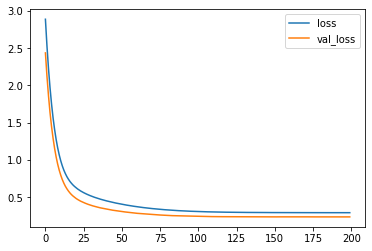

In [20]:
df_hist[['loss', 'val_loss']].plot()

## LASSO Regression (L1 Regularization)

In [21]:
from tensorflow.keras.regularizers import l1

In [22]:
def lasso_regression(penality):
  model = Sequential([
                      layers.Dense(units=1,input_shape=(13,),kernel_regularizer=l1(penality))
  ])
  # loss and optimizer
  loss = tf.keras.losses.mean_squared_error
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile
  model.compile(optimizer=optimizer,loss=loss)
  return model

In [69]:
penality = [1e-9,3e-9,6e-9,
            1e-8,3e-8,6e-8,
            1e-7,3e-7,6e-7,
            1e-6,3e-6,6e-6,
            1e-5,3e-5,6e-5,
            1e-4,3e-4,6e-4,
            1e-3,3e-3,6e-3,
            1e-2,3e-2,6e-2,
            1e-1,3e-1,6e-1,1,3,6,10]

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 4.1210 - val_loss: 3.2351
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.7336 - val_loss: 2.9213
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 3.3936 - val_loss: 2.6398
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0818 - val_loss: 2.3922
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8122 - val_loss: 2.1639
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5648 - val_loss: 1.9714
Epoch 7/500
26/26 [==============================] - 0s 2ms/step - loss: 2.3539 - val_loss: 1.8015
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1654 - val_loss: 1.6501
Epoch 9/500
26/26 [==============================] - 0s 2ms/step - loss: 1.9938 - val_loss: 1.5208
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

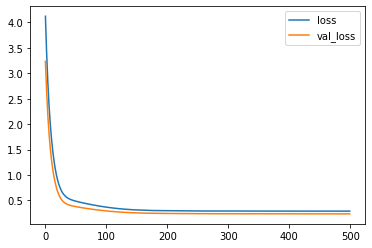

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 6ms/step - loss: 4.0160 - val_loss: 2.8719
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.6327 - val_loss: 2.5942
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.2914 - val_loss: 2.3522
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0027 - val_loss: 2.1357
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.7402 - val_loss: 1.9509
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5053 - val_loss: 1.7885
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3000 - val_loss: 1.6451
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1205 - val_loss: 1.5127
Epoch 9/500
26/26 [==============================] - 0s 2ms/step - loss: 1.9531 - val_loss: 1.4047
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

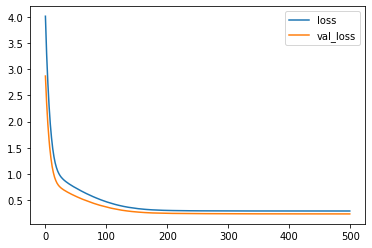

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 3.4590 - val_loss: 3.0219
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0843 - val_loss: 2.6880
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.7482 - val_loss: 2.3911
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4542 - val_loss: 2.1216
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1926 - val_loss: 1.8936
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9669 - val_loss: 1.6939
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7707 - val_loss: 1.5197
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6023 - val_loss: 1.3667
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4541 - val_loss: 1.2394
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

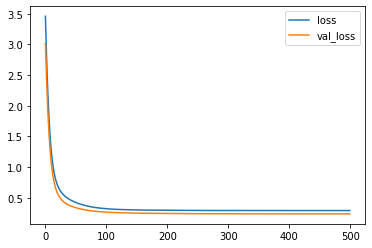

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 6ms/step - loss: 1.9647 - val_loss: 1.6760
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 1.7320 - val_loss: 1.4808
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5523 - val_loss: 1.3260
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4091 - val_loss: 1.2037
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2907 - val_loss: 1.1025
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1910 - val_loss: 1.0186
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1054 - val_loss: 0.9441
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0296 - val_loss: 0.8782
Epoch 9/500
26/26 [==============================] - 0s 2ms/step - loss: 0.9626 - val_loss: 0.8211
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

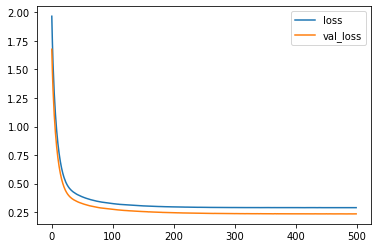

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 1.7719 - val_loss: 1.4371
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5961 - val_loss: 1.2986
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4617 - val_loss: 1.1915
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3533 - val_loss: 1.1064
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2660 - val_loss: 1.0352
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1902 - val_loss: 0.9737
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1230 - val_loss: 0.9189
Epoch 8/500
26/26 [==============================] - 0s 2ms/step - loss: 1.0637 - val_loss: 0.8697
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0074 - val_loss: 0.8249
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

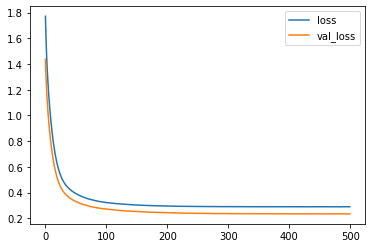

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 1.3789 - val_loss: 1.1993
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2731 - val_loss: 1.1146
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1904 - val_loss: 1.0459
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1230 - val_loss: 0.9876
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0650 - val_loss: 0.9386
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0141 - val_loss: 0.8924
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9690 - val_loss: 0.8514
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9288 - val_loss: 0.8145
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8921 - val_loss: 0.7816
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

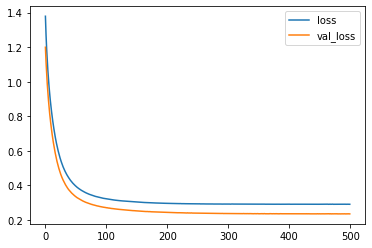

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 1.1946 - val_loss: 0.8000
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1072 - val_loss: 0.7497
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0508 - val_loss: 0.7192
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0147 - val_loss: 0.6992
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9843 - val_loss: 0.6825
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9600 - val_loss: 0.6690
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9393 - val_loss: 0.6563
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9208 - val_loss: 0.6451
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9015 - val_loss: 0.6336
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

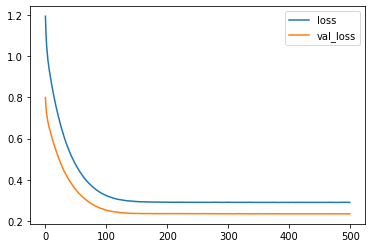

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 1.3871 - val_loss: 1.1858
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2380 - val_loss: 1.0533
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1261 - val_loss: 0.9471
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0341 - val_loss: 0.8660
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9597 - val_loss: 0.7995
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8966 - val_loss: 0.7413
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8392 - val_loss: 0.6914
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7910 - val_loss: 0.6457
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7462 - val_loss: 0.6069
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

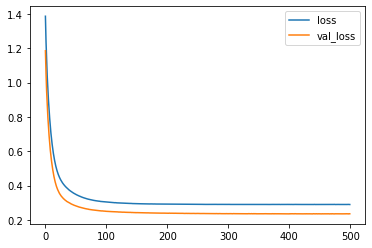

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 2.8977 - val_loss: 2.3521
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5005 - val_loss: 2.0219
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1563 - val_loss: 1.7520
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8715 - val_loss: 1.5228
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6334 - val_loss: 1.3324
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4364 - val_loss: 1.1786
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2761 - val_loss: 1.0508
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1437 - val_loss: 0.9475
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0352 - val_loss: 0.8627
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

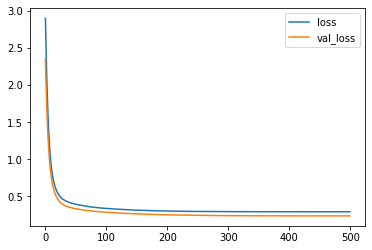

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 2.2859 - val_loss: 2.1392
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 2.0572 - val_loss: 1.9187
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8632 - val_loss: 1.7354
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6987 - val_loss: 1.5770
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5531 - val_loss: 1.4423
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4290 - val_loss: 1.3197
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3149 - val_loss: 1.2139
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2147 - val_loss: 1.1181
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1239 - val_loss: 1.0313
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

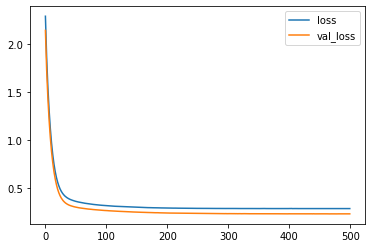

Running the model for lambda = 0.000003
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 1.9775 - val_loss: 1.4320
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8278 - val_loss: 1.3255
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6985 - val_loss: 1.2307
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5793 - val_loss: 1.1459
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4725 - val_loss: 1.0698
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3790 - val_loss: 1.0032
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2953 - val_loss: 0.9470
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2224 - val_loss: 0.8976
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1578 - val_loss: 0.8515
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

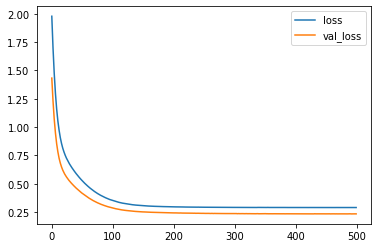

Running the model for lambda = 0.000006
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 3.6075 - val_loss: 2.7355
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 3.2225 - val_loss: 2.4422
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8822 - val_loss: 2.1812
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2.5834 - val_loss: 1.9478
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 2.3239 - val_loss: 1.7520
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 2.0977 - val_loss: 1.5820
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8997 - val_loss: 1.4322
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7270 - val_loss: 1.2988
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5749 - val_loss: 1.1845
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

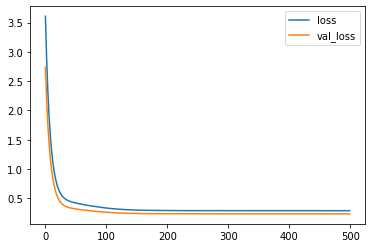

Running the model for lambda = 0.000010
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 1.8144 - val_loss: 1.5507
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6096 - val_loss: 1.3792
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4413 - val_loss: 1.2366
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3029 - val_loss: 1.1188
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1878 - val_loss: 1.0234
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0925 - val_loss: 0.9434
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0126 - val_loss: 0.8735
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9437 - val_loss: 0.8146
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8834 - val_loss: 0.7626
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

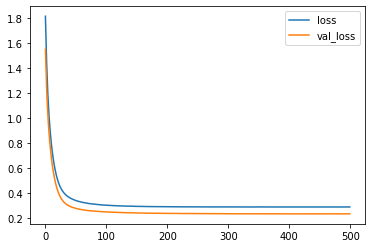

Running the model for lambda = 0.000030
Epoch 1/500
26/26 [==============================] - 0s 6ms/step - loss: 1.9605 - val_loss: 1.5051
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7815 - val_loss: 1.3739
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6298 - val_loss: 1.2650
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5040 - val_loss: 1.1748
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3976 - val_loss: 1.0961
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3076 - val_loss: 1.0262
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2269 - val_loss: 0.9678
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1590 - val_loss: 0.9133
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0979 - val_loss: 0.8654
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

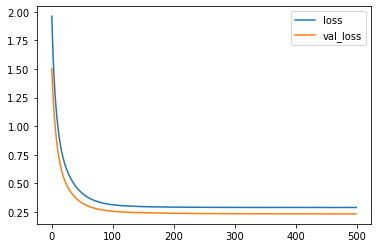

Running the model for lambda = 0.000060
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 1.5212 - val_loss: 1.3556
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3652 - val_loss: 1.2149
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2388 - val_loss: 1.1014
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1382 - val_loss: 1.0108
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0554 - val_loss: 0.9394
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9904 - val_loss: 0.8779
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9342 - val_loss: 0.8266
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8856 - val_loss: 0.7825
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.8439 - val_loss: 0.7436
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

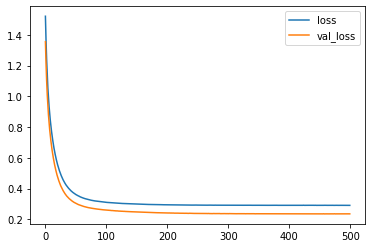

Running the model for lambda = 0.000100
Epoch 1/500
26/26 [==============================] - 0s 8ms/step - loss: 2.4742 - val_loss: 1.7284
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2080 - val_loss: 1.5276
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9797 - val_loss: 1.3674
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7875 - val_loss: 1.2299
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6222 - val_loss: 1.1096
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4749 - val_loss: 1.0117
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3486 - val_loss: 0.9283
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2438 - val_loss: 0.8504
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1454 - val_loss: 0.7871
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

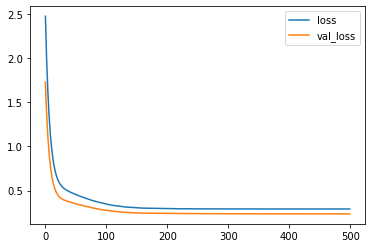

Running the model for lambda = 0.000300
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 3.8683 - val_loss: 2.9297
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.4494 - val_loss: 2.6007
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0889 - val_loss: 2.3180
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.7724 - val_loss: 2.0807
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5015 - val_loss: 1.8784
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2669 - val_loss: 1.7039
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0645 - val_loss: 1.5494
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8811 - val_loss: 1.4201
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7238 - val_loss: 1.3035
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

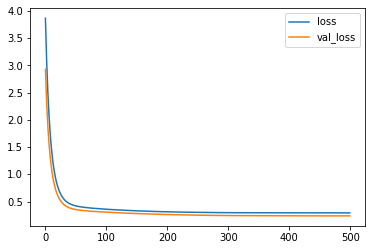

Running the model for lambda = 0.000600
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 1.7729 - val_loss: 1.3839
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 1.5900 - val_loss: 1.2328
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4309 - val_loss: 1.1065
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2930 - val_loss: 0.9975
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1743 - val_loss: 0.9002
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0675 - val_loss: 0.8186
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9762 - val_loss: 0.7439
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8954 - val_loss: 0.6827
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8264 - val_loss: 0.6300
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

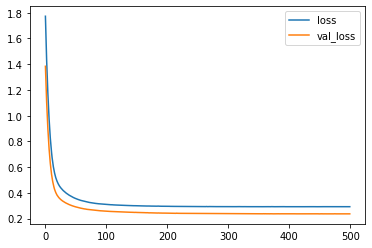

Running the model for lambda = 0.001000
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9062 - val_loss: 0.7213
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8085 - val_loss: 0.6492
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 0.7338 - val_loss: 0.5925
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6743 - val_loss: 0.5451
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6235 - val_loss: 0.5078
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5825 - val_loss: 0.4752
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5483 - val_loss: 0.4483
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5195 - val_loss: 0.4264
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.4963 - val_loss: 0.4077
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - l

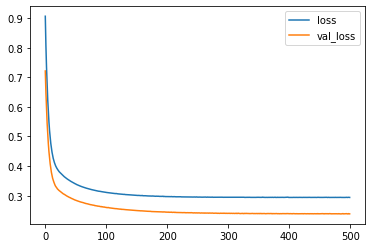

Running the model for lambda = 0.003000
Epoch 1/500
26/26 [==============================] - 0s 8ms/step - loss: 3.2984 - val_loss: 2.4769
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.9974 - val_loss: 2.2579
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 2.7422 - val_loss: 2.0624
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2.5121 - val_loss: 1.8976
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2.3085 - val_loss: 1.7533
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1301 - val_loss: 1.6121
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 1.9614 - val_loss: 1.4931
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8139 - val_loss: 1.3890
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6843 - val_loss: 1.2875
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

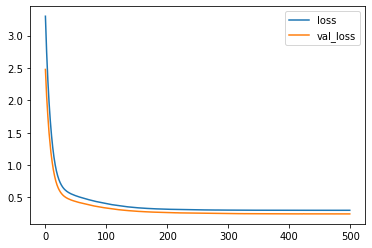

Running the model for lambda = 0.006000
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 4.6395 - val_loss: 3.3731
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 4.2522 - val_loss: 3.0866
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 3.9172 - val_loss: 2.8361
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 3.6279 - val_loss: 2.6118
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 3.3579 - val_loss: 2.4300
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 3.1292 - val_loss: 2.2621
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.9240 - val_loss: 2.1076
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 2.7357 - val_loss: 1.9709
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 2.5647 - val_loss: 1.8504
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

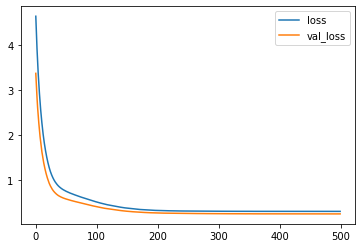

Running the model for lambda = 0.010000
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 2.7368 - val_loss: 1.9192
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 2.4596 - val_loss: 1.7222
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 2.2128 - val_loss: 1.5558
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 1.9979 - val_loss: 1.4070
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.8086 - val_loss: 1.2780
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.6410 - val_loss: 1.1659
Epoch 7/500
26/26 [==============================] - 0s 6ms/step - loss: 1.4940 - val_loss: 1.0695
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3658 - val_loss: 0.9822
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2529 - val_loss: 0.9087
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

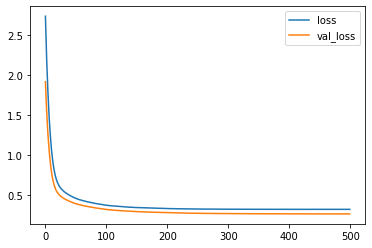

Running the model for lambda = 0.030000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 3.6308 - val_loss: 2.7934
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 3.2412 - val_loss: 2.5061
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 2.9218 - val_loss: 2.2461
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2.6400 - val_loss: 2.0435
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4066 - val_loss: 1.8635
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 2.1990 - val_loss: 1.7069
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.0176 - val_loss: 1.5674
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8542 - val_loss: 1.4411
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7082 - val_loss: 1.3311
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

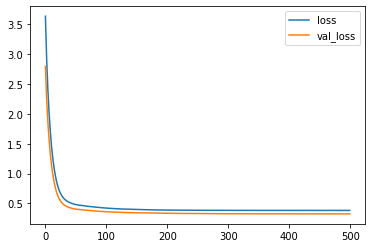

Running the model for lambda = 0.060000
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 2.4166 - val_loss: 1.8012
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 2.0729 - val_loss: 1.5476
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7999 - val_loss: 1.3367
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5721 - val_loss: 1.1745
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3943 - val_loss: 1.0444
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2516 - val_loss: 0.9436
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1375 - val_loss: 0.8659
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0469 - val_loss: 0.8041
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9745 - val_loss: 0.7538
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

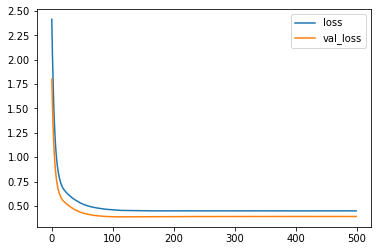

Running the model for lambda = 0.100000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 3.4714 - val_loss: 2.5554
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 3.1402 - val_loss: 2.3098
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 2.8554 - val_loss: 2.1027
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 2.6121 - val_loss: 1.9194
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4052 - val_loss: 1.7632
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 2.2231 - val_loss: 1.6341
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 2.0689 - val_loss: 1.5152
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 1.9286 - val_loss: 1.4128
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 1.8026 - val_loss: 1.3244
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

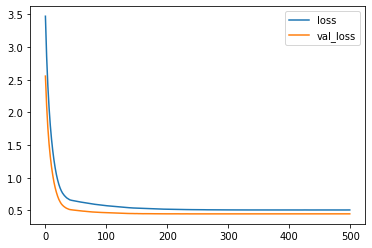

Running the model for lambda = 0.300000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 3.6735 - val_loss: 2.9829
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 3.3473 - val_loss: 2.7247
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0662 - val_loss: 2.5018
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 2.8231 - val_loss: 2.3079
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 2.6102 - val_loss: 2.1353
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4204 - val_loss: 1.9851
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.2607 - val_loss: 1.8557
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1182 - val_loss: 1.7415
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9918 - val_loss: 1.6360
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

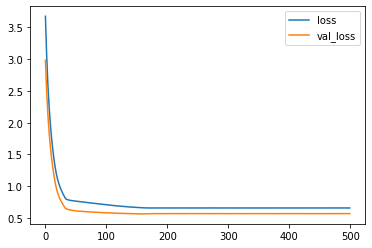

Running the model for lambda = 0.600000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 3.2270 - val_loss: 3.0240
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 2.9950 - val_loss: 2.7942
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 2.7835 - val_loss: 2.5911
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2.5928 - val_loss: 2.4051
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 2.4192 - val_loss: 2.2310
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 2.2543 - val_loss: 2.0733
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1046 - val_loss: 1.9234
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9602 - val_loss: 1.7840
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8318 - val_loss: 1.6594
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

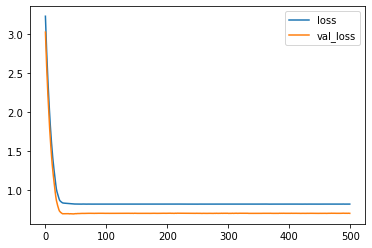

Running the model for lambda = 1.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 6.3205 - val_loss: 5.5697
Epoch 2/500
26/26 [==============================] - 0s 6ms/step - loss: 5.8332 - val_loss: 5.1294
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 5.3877 - val_loss: 4.7150
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 4.9881 - val_loss: 4.3641
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 4.6302 - val_loss: 4.0518
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 4.3126 - val_loss: 3.7678
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 4.0161 - val_loss: 3.5029
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 3.7582 - val_loss: 3.2815
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 3.5274 - val_loss: 3.0692
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

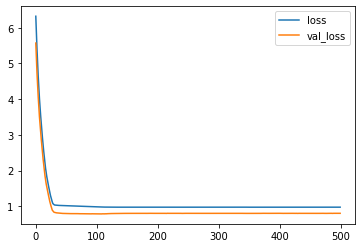

Running the model for lambda = 3.000000
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 12.7139 - val_loss: 11.7126
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 11.6225 - val_loss: 10.6976
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 10.6053 - val_loss: 9.7059
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 9.6723 - val_loss: 8.8446
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 8.8076 - val_loss: 8.0159
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 8.0338 - val_loss: 7.2824
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 7.3142 - val_loss: 6.5971
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 6.6880 - val_loss: 6.0192
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 6.1091 - val_loss: 5.4592
Epoch 10/500
26/26 [==============================] - 0s 4ms/ste

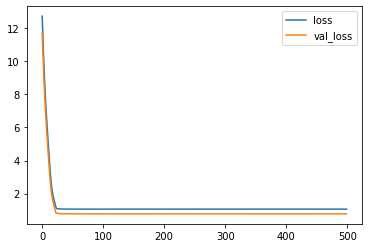

Running the model for lambda = 6.000000
Epoch 1/500
26/26 [==============================] - 0s 7ms/step - loss: 30.1798 - val_loss: 28.8482
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 28.0313 - val_loss: 26.7135
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 25.9031 - val_loss: 24.6070
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 23.8757 - val_loss: 22.6591
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 21.9327 - val_loss: 20.7386
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 20.0444 - val_loss: 18.9203
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 18.2824 - val_loss: 17.1890
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 16.5995 - val_loss: 15.6236
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 15.1773 - val_loss: 14.3208
Epoch 10/500
26/26 [==============================]

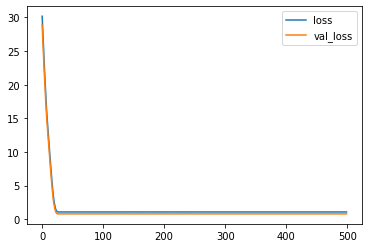

Running the model for lambda = 10.000000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 45.3064 - val_loss: 42.9192
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 42.1462 - val_loss: 39.8947
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 39.1126 - val_loss: 36.9126
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 36.1722 - val_loss: 34.1374
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 33.4162 - val_loss: 31.4402
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 30.7382 - val_loss: 28.9229
Epoch 7/500
26/26 [==============================] - 0s 7ms/step - loss: 28.3054 - val_loss: 26.6410
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 26.0998 - val_loss: 24.5074
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 23.9602 - val_loss: 22.3875
Epoch 10/500
26/26 [==============================

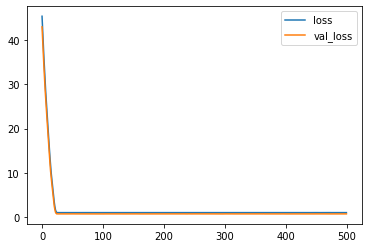

In [70]:
loss_values = []
for lam in penality:
  print('Running the model for lambda = %f'%lam)
  # initilizing the model with lamda
  model_lasso = lasso_regression(lam)
  # fitting the model
  history = model_lasso.fit(x_train,y_train,batch_size=100,epochs=500,validation_data=(x_test,y_test))
  # Visulaize the loss function for different iterations or epochs
  df_history = pd.DataFrame(history.history)
  df_history[['loss','val_loss']].plot()
  plt.show()
  # save the weight
  weights = model_lasso.get_weights() # column
  try:
    weight_penality = np.concatenate((weight_penality, weights[0].T),axis=0)
  except:
    weight_penality = weights[0].T #rows
  # loss
  loss_values.append(df_history.iloc[-1].to_dict())



## Feature Selection

In [71]:
log_lambda = np.log10(penality)

In [72]:
df_weight = pd.DataFrame(weight_penality)

In [73]:
df_loss = pd.DataFrame(loss_values)

Visualization

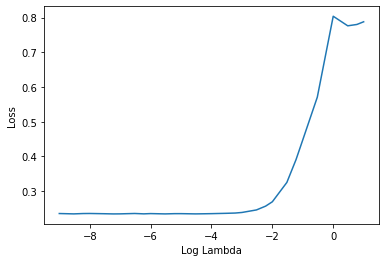

In [74]:
plt.plot(log_lambda,df_loss['val_loss'])
plt.xlabel('Log Lambda')
plt.ylabel('Loss')
plt.show()

In [76]:
list(log_lambda).index(-2)

21

In [77]:
x = pickle.load(open('preprocessing/x_norm.pickle', 'rb'))

In [78]:
x.drop('index', axis=1,inplace=True)

In [79]:
x.columns

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'city_1', 'fct_Favorite',
       'fg_Favorite', 'fg_Uniform'],
      dtype='object')

In [80]:
x.iloc[:,[8,4,5,10,1,0,6,7,9]].columns

Index(['NoOfGamesBought', 'FrquncyOfPurchase', 'NoOfUnitsPurchased',
       'fct_Favorite', 'MinAgeOfChild', 'NoOfChildren', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'city_1'],
      dtype='object')